In [0]:
#Mount drive files
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#install fast ai
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 576.2MB 27kB/s 
    100% |████████████████████████████████| 17.3MB 2.0MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [0]:
#import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [1]:
#get biopaper data 
trainCsvPath = 'drive/My Drive/Year5/csc4006 Final Project/data/bioPaperExport_text_label.csv'
df = pd.read_csv(trainCsvPath)
df.head()

NameError: ignored

In [0]:
df.shape

(29319, 2)

In [0]:
##sentence tokeniser
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
def split_into_sentences(dataframe):
  sent_df = pd.DataFrame(columns=['text','label'])
  sList = []
  for i,row in dataframe.iterrows():
    text = row['text']
    label = row['label']
    sentences = sentence_tokenizer.tokenize(text)

    for s in sentences:
      clean_s = get_clean_text(s)
      sList.append((label,clean_s))
  return pd.DataFrame(sList,columns=['label','text'])

In [0]:
df.label.unique()
all_labels = ['neuroscience', 'cancer biology', 'cell biology', 'bioengineering', 'molecular biology', 'biochemistry',
       'developmental biology', 'biophysics', 'systems biology', 'plant biology', 'evolutionary biology', 'zoology',
       'bioinformatics', 'animal behavior and cognition', 'ecology', 'genomics',
       'scientific communication and education', 'genetics', 'immunology', 'pharmacology and toxicology',
       'microbiology', 'physiology', 'epidemiology', 'synthetic biology', 'clinical trials', 'pathology',
       'paleontology', 'unknown']

small_categories = ['bioengineering','animal behavior and cognition','physiology','synthetic biology','pharmacology and toxicology',
                    'scientific communication and education','pathology','zoology','clinical trials','paleontology','unknown']


no_unk = ['unknown']


In [0]:
##removing smaller categories to see effect on accuracy
df.text[0]
values = df.label.value_counts()


for category in no_unk:
  df = df[df.label != category]

df.label.unique()

array(['neuroscience', 'cancer biology', 'cell biology', 'bioengineering', 'molecular biology', 'biochemistry',
       'developmental biology', 'biophysics', 'systems biology', 'plant biology', 'evolutionary biology', 'zoology',
       'bioinformatics', 'animal behavior and cognition', 'ecology', 'genomics',
       'scientific communication and education', 'genetics', 'immunology', 'pharmacology and toxicology',
       'microbiology', 'physiology', 'epidemiology', 'synthetic biology', 'clinical trials', 'pathology',
       'paleontology'], dtype=object)

In [0]:
def get_label_count(dataframe, label):
  return int(dataframe['label'].value_counts()[label])


##Sample a number of rows per category, if category len < sampleSize, get all of category
def sample_by_category(sampleSize,dataframe):
  sampled_df = pd.DataFrame(columns=['label','text'])
  for lb in dataframe.label.unique():
    size = get_label_count(dataframe,lb)
    if size < sampleSize:
      sample_category_df = dataframe[dataframe.label == lb]
    else:
      sample_category_df = dataframe[dataframe.label == lb].sample(n=sampleSize)
      
    sampled_df = pd.concat([sampled_df,sample_category_df])
  return sampled_df

In [0]:
df = sample_by_category(100,df)

In [0]:
##split df into sentences


In [0]:
df.shape

(10857, 2)

In [0]:
len(df.text.max())

1129

In [0]:
bs=48

In [0]:
#split training and testing data (70:30)
from sklearn.model_selection import train_test_split
trainDf, testDf = train_test_split(df,stratify=df['label'], test_size = 0.3, random_state = 11)

trainDf.shape,testDf.shape

((1822, 2), (782, 2))

In [0]:
#create models from data 
data_lm = TextLMDataBunch.from_df(train_df=trainDf,valid_df=testDf,path='',text_cols='text', label_cols='label')

In [0]:
data_lm.show_batch()

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


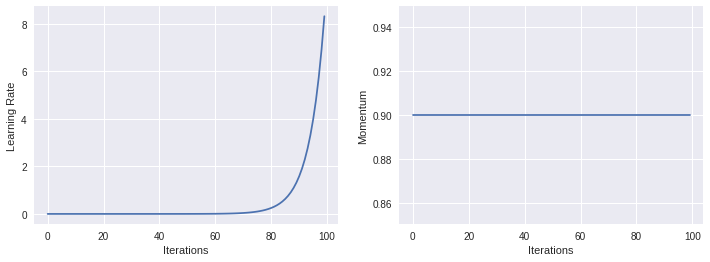

In [0]:
learn.recorder.plot_lr(show_moms=True)

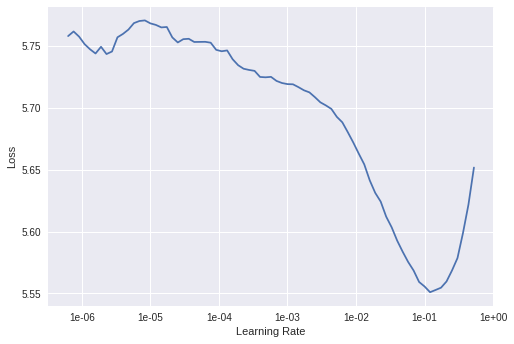

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
#no need to re run, load model weights from drive
##rerun for new smaller dataset
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.993272,4.321728,0.293721,00:47


In [0]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(15381, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(15381, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=15381, bias=True)
    (output_dp): RNNDropout()
  )
)

In [0]:
##alt learning
from fastai.callbacks import *
cb = OneCycleScheduler(learn, lr_max=0.01)
learn.fit(1, callbacks=cb)

epoch,train_loss,valid_loss,accuracy,time
1,4.501757,4.148255,0.309798,16:33


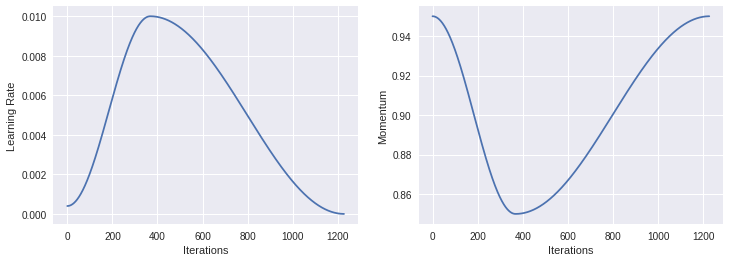

In [0]:
learn.recorder.plot_lr(show_moms=True)

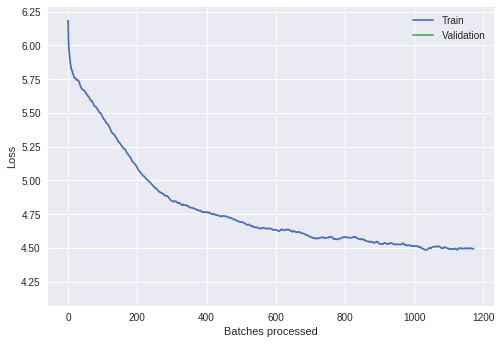

In [0]:
#learn.save('bio02_fit_head')
learn.recorder.plot_losses()

In [0]:
##Run cell to load data models
#from fastai.torch_core import *
#load from drive
#modelPath = 'drive/My Drive/Year5/csc4006 Final Project/models/bioAbstract02/'
#modelFitHead = 'bio02_fit_head.pth'
#fit_head = modelPath+modelFitHead
#state = torch.load(fit_head,map_location=None)



In [0]:
#get_model(learn.model).load_state_dict(state['model'], strict=True)

In [0]:
learn.unfreeze()

In [0]:
#finetuning
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.171221,4.095210,0.315760,05:22


In [0]:
learn.save('ab_lm_fine_tuned_2')

In [0]:
learn.load('ab_lm_fine_tuned_2');

In [0]:
TEXT = "We show that these effects can"
N_WORDS = 40
N_SENTENCES = 2
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

We show that these effects can be influenced by higher Therefore , we used a linear framework and the method to analyse the function of the Agrobacterium - expressing lineage , a novel class of new DNA polymerases . We describe
We show that these effects can be explained by the relative importance of the physical cues . We have found that each of the two dimensions is impaired in the low and low - density Drosophila populations . We estimated the size of


In [0]:
learn.save_encoder('ab_lm_fine_tuned_2_enc')

In [0]:
learn.export()

In [0]:
data_clas = TextClasDataBunch.from_df(path='',train_df=trainDf, valid_df=testDf, vocab=data_lm.train_ds.vocab,text_cols='text', label_cols='label')

In [0]:
data_clas.show_batch()

In [0]:
learn = text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.5)
learn.load_encoder('ab_lm_fine_tuned_2_enc')
learn.freeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


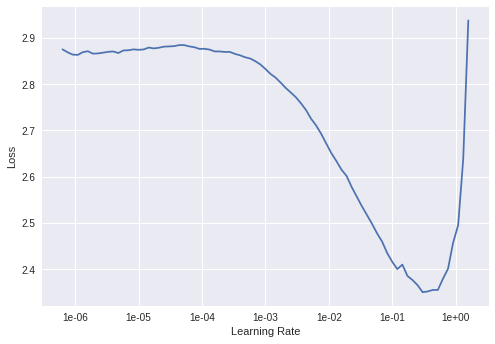

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.756832,2.483947,0.342711,00:24


In [0]:
learn.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(15381, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(15381, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1150, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1150, 1150, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1150, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.2)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=

In [0]:
learn.save('ab_clas_basic_2')

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(5, slice(1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.683532,1.569707,0.511664,01:58
1,1.719369,1.555049,0.515961,02:00
2,1.627888,1.496203,0.538674,01:59
3,1.578194,1.469689,0.546347,02:00
4,1.502789,1.457159,0.549417,02:00


In [0]:
learn.save('ab_clas_fine_tuned_2')

In [0]:
learn.load('ab_clas_fine_tuned_2');


In [0]:
learn.export('ab_clas_fine_tuned_2_export')

In [0]:
learn.unfreeze()

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.499454,1.463973,0.542664,03:00


In [0]:
learn.save('ab_clas_finetuned')

In [0]:
learn.save_encoder('ab_clas_fine_tuned_2_enc')

In [0]:
learn.export()

In [0]:
learn.predict("Background: Hepatitis B Virus (HBV) and Hepatitis C Virus (HCV) are the leading causes of liver-related morbidity and mortality throughout the world. The magnitude of HBV and HCV infections in Ethiopia has not been well studied at community level. This study aimed at investigating the sero-prevalence and associated risk factors of HBV and HCV among HBV unvaccinated community members in South Omo Zone, Southern Ethiopia. Methods: A community-based cross-sectional study was conducted in three districts from March to May 2018. Structured questionnaire was used to collect relevant clinical and socio-demographic data. Three milliliter of blood sample was collected from each study participant and screened for HBV and HCV using one step hepatitis B surface antigen (HBsAg) test strip and one step HCV test strip, respectively. Samples found positive for HBsAg were further tested using immunoassay of Alere DetermineTM HBsAg (Alere Inc., USA). Data was analyzed using SPSS version 25.0. Results: A total of 625 (51.4% males, age 6-80 years, mean age ± SD = 30.83 ± 13.51 years) individuals participated in the study. The sero-prevalence for HBV infection was 8.0% as detected using one step HBsAg test strip, while it was 7.2% using Alere DetermineTM HBsAg test. The sero-prevalence for HCV infection was 1.9%. Two (0.3%) of the participants were seropositive for both HBV and HCV infections. High sero-prevalence for HBV infection was associated with weakness and fatigue (AOR = 5.20; 95% CI: 1.58, 17.15), while high sero-prevalence of HCV infection was associated with age group between 46 and 65 years (AOR = 13.02; 95% CI: 1.11, 152.41). Conclusion: this study revealed higher-intermediate endemicity level of HBV infection and low to intermediate endemicity level of HCV infection in the study area. Clinical symptoms like weakness and fatigue were found to be indictors for HBV infection, while individuals in the age group between 46 and 65 years were at higher risk for HCV infection. Provision of community- based health education, vaccination, mass screening and providing treatment would have utmost importance in reducing the transmission of these diseases in the present study area. Keywords: community, sero-prevalence, hepatitis, Southern Ethiopia")

(<fastai.core.Category at 0x7f5721b71fd0>,
 tensor(7),
 tensor([2.3161e-05, 4.2422e-05, 1.7037e-05, 5.6926e-05, 5.7303e-06, 1.6140e-06,
         1.2207e-03, 9.6424e-01, 1.7579e-05, 5.3891e-05, 5.7538e-05, 2.0108e-02,
         1.4131e-02, 8.6657e-06, 3.5565e-06, 2.8503e-07, 1.4293e-05]))

In [0]:
predictions = learn.get_preds()

In [0]:
len(predictions[1])

5381

In [0]:
preds = learn.get_preds(ds_type=DatasetType.Train)

In [0]:

test = preds[1][0]

In [0]:

import tensorflow as tf
print(tf.keras.backend.get_value(test))

AttributeError: ignored